# Pymaceuticals Inc.
---

### Analysis

- The summary table shows how the mean and median of each drug are close together, this points to a normal distribution for all of them. 
- There were more obscervations done for the Capomulin and Ramicane drugs, but also, these are the drugs with more mouse count.
- Assuming that the mice were randomly assigned to the different drugs, we can say that Ramicane was the most successful treatment because the mean volume of the tumors is 36.56 and there are no outliers, followed by Capomulin with 38.1251. 
- We can observe that there is a correlation between the weight of the mouse and the volume of the tumor. The heavier the mouse, the volume of the tumor was grater. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset.  
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mouse_count = mouse_study_complete["Mouse ID"].unique().size
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup_id = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989", :]
mice_dup_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
mice_dup_id['Mouse ID']


908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
918    g989
919    g989
920    g989
Name: Mouse ID, dtype: object

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_id_clean = mouse_study_complete.isin(mice_dup_id)
#df.loc[df['a'] > 10, ['a’, 'c']]

mice_id_clean2 = mouse_study_complete.loc[mouse_study_complete['Mouse ID'].isin(mice_dup) == False]

mice_id_clean2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse__clean_count = mice_id_clean2["Mouse ID"].unique().size

mouse__clean_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#df.groupby('A')['B'].mean()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = mice_id_clean2['Tumor Volume (mm3)'].groupby(mice_id_clean2['Drug Regimen']).mean()
median = mice_id_clean2['Tumor Volume (mm3)'].groupby(mice_id_clean2['Drug Regimen']).median()
variance = mice_id_clean2['Tumor Volume (mm3)'].groupby(mice_id_clean2['Drug Regimen']).var()
std_dev = mice_id_clean2['Tumor Volume (mm3)'].groupby(mice_id_clean2['Drug Regimen']).std()
std_err = mice_id_clean2['Tumor Volume (mm3)'].groupby(mice_id_clean2['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std_dev, 
                           "Tumor Volume Std. Err.":std_err})

summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat2 =  mice_id_clean2.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
#Create a count per drug regimen and row count to plot bar
drug_regimen_count = mice_id_clean2.value_counts("Drug Regimen")
drug_regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

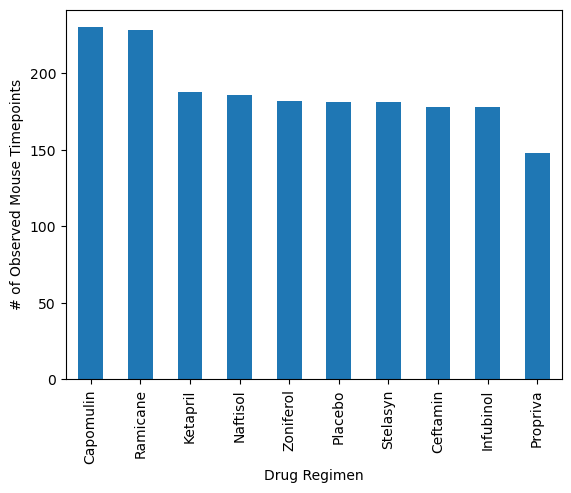

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


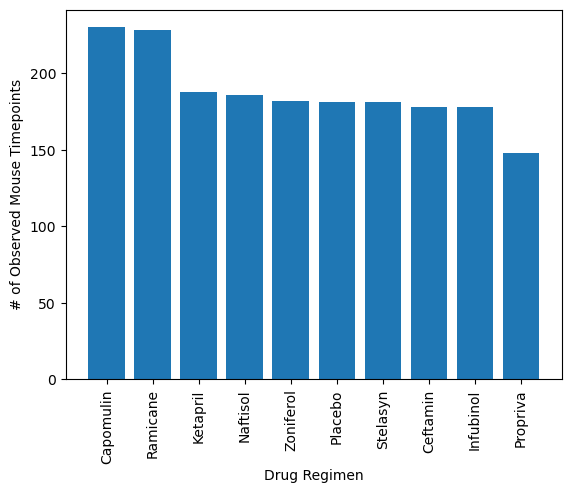

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=drug_regimen_count.index
y=drug_regimen_count.values
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

In [13]:
male_female_count = mice_id_clean2.value_counts("Sex")
male_female_count

Sex
Male      958
Female    922
dtype: int64

Text(0, 0.5, 'Sex')

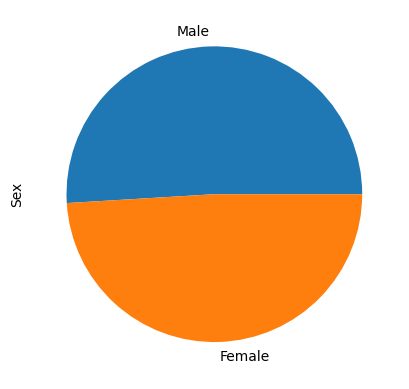

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_count.plot.pie()
plt.ylabel("Sex")

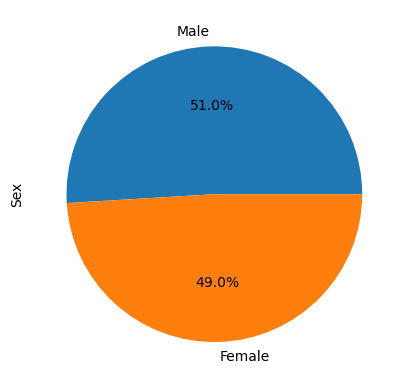

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=mice_id_clean2["Sex"].value_counts()
gender_count.plot(kind="pie",autopct='%.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

max_df=mice_id_clean2.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df=pd.merge(max_df,mice_id_clean2,how="left",on=["Mouse ID","Timepoint"])
merge_df

# Create a dateframe from each drug (Capomulin, Ramicane, Infubinol, and Ceftamin) from the clean dataframe.
Capo_df = mice_id_clean2.loc[mice_id_clean2["Drug Regimen"] == "Capomulin",:]
Rami_df = mice_id_clean2.loc[mice_id_clean2["Drug Regimen"] == "Ramicane", :]
Infu_df = mice_id_clean2.loc[mice_id_clean2["Drug Regimen"] == "Infubinol", :]
Cefta_df = mice_id_clean2.loc[mice_id_clean2["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capo_last = Capo_df.groupby('Mouse ID').max()['Timepoint']
Capo_vol = pd.DataFrame(Capo_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capo_merge = pd.merge(Capo_vol, mice_id_clean2, on=("Mouse ID","Timepoint"),how="left")
Capo_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [17]:
#Calculate quartiles and print results for Capomulin
Capo_tumor_volume = Capo_merge["Tumor Volume (mm3)"]

quartiles = Capo_tumor_volume.quantile([.25,.5,.75])
low_quartile = quartiles[0.25]
up_quartile = quartiles[0.75]
iqr = up_quartile-low_quartile


print(f"The lower quartile of Capomulin tumors is {low_quartile}")
print(f"The upper quartile of Capomulin tumors is {up_quartile}")
print(f"The interquartile range of Capomulin tumors is {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = low_quartile - (1.5*iqr)
upper_bound = up_quartile + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors is 32.37735684
The upper quartile of Capomulin tumors is 40.1592203
The interquartile range of Capomulin tumors is 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


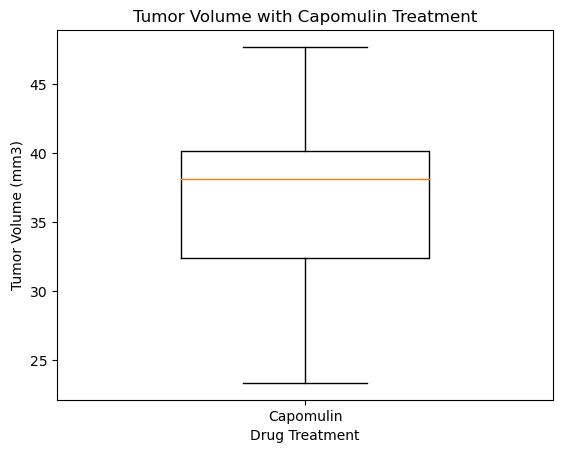

In [18]:
#Capomulin box plot
Capo_bplot = [Capo_tumor_volume]
treatment = ['Capomulin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume with Capomulin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Treatment')
ax1.boxplot(Capo_bplot, labels=treatment, widths = .5, vert=True)
plt.show()

In [19]:
#Ramicane
# Start by getting the last (greatest) timepoint for each mouse
Rami_last = Rami_df.groupby('Mouse ID').max()['Timepoint']
Rami_vol = pd.DataFrame(Rami_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Rami_merge = pd.merge(Rami_vol, mice_id_clean2, on=("Mouse ID","Timepoint"),how="left")
Rami_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [20]:
#Calculate quartiles and print results for Ramicane
Rami_tumor_volume = Rami_merge["Tumor Volume (mm3)"]

quartiles = Rami_tumor_volume.quantile([.25,.5,.75])
low_quartile = quartiles[0.25]
up_quartile = quartiles[0.75]
iqr = up_quartile-low_quartile


print(f"The lower quartile of Ramicane tumors is {low_quartile}")
print(f"The upper quartile of Ramicane tumors is {up_quartile}")
print(f"The interquartile range of Ramicane tumors is {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = low_quartile - (1.5*iqr)
upper_bound = up_quartile + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is 31.56046955
The upper quartile of Ramicane tumors is 40.65900627
The interquartile range of Ramicane tumors is 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


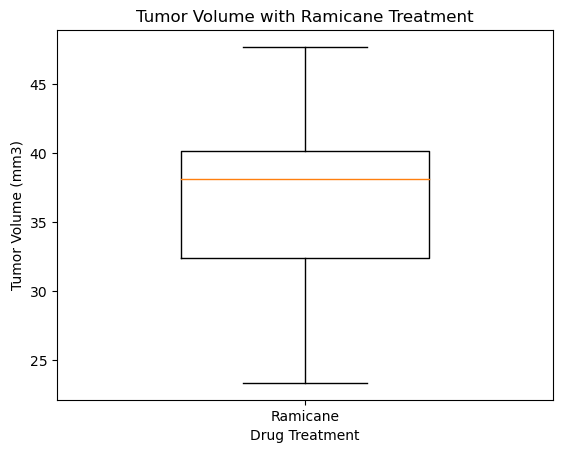

In [21]:
#Ramicane box plot
Rami_bplot = [Rami_tumor_volume]
treatment = ['Ramicane']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume with Ramicane Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Treatment')
ax1.boxplot(Capo_bplot, labels=treatment, widths = .5, vert=True)
plt.show()

In [22]:
#Infubinol
# Start by getting the last (greatest) timepoint for each mouse
Infu_last = Infu_df.groupby('Mouse ID').max()['Timepoint']
Infu_vol = pd.DataFrame(Infu_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infu_merge = pd.merge(Infu_vol, mice_id_clean2, on=("Mouse ID","Timepoint"),how="left")
Infu_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [23]:
#Calculate quartiles and print results for Infubinol
Infu_tumor_volume = Infu_merge["Tumor Volume (mm3)"]

quartiles = Infu_tumor_volume.quantile([.25,.5,.75])
low_quartile = quartiles[0.25]
up_quartile = quartiles[0.75]
iqr = up_quartile-low_quartile


print(f"The lower quartile of Infubinol tumors is {low_quartile}")
print(f"The upper quartile of Infubinol tumors is {up_quartile}")
print(f"The interquartile range of Infubinol tumors is {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = low_quartile - (1.5*iqr)
upper_bound = up_quartile + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is 54.04860769
The upper quartile of Infubinol tumors is 65.52574285
The interquartile range of Infubinol tumors is 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


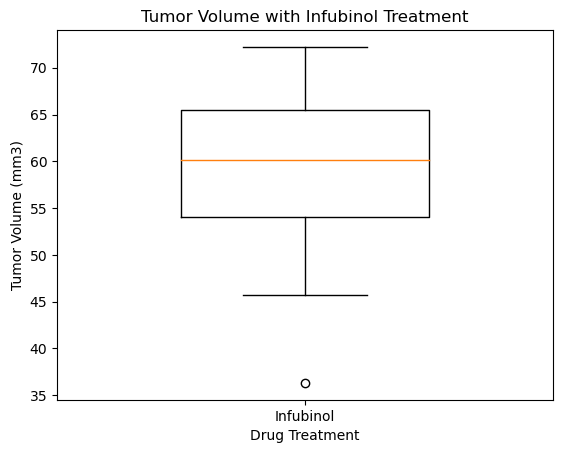

In [24]:
#Ramicane box plot
Infu_bplot = [Infu_tumor_volume]
treatment = ['Infubinol']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume with Infubinol Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Treatment')
ax1.boxplot(Infu_bplot, labels=treatment, widths = .5, vert=True)
plt.show()

In [25]:
#Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Cefta_last = Cefta_df.groupby('Mouse ID').max()['Timepoint']
Cefta_vol = pd.DataFrame(Cefta_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Cefta_merge = pd.merge(Cefta_vol, mice_id_clean2, on=("Mouse ID","Timepoint"),how="left")
Cefta_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [26]:
#Calculate quartiles and print results for Ceftamin
Cefta_tumor_volume = Cefta_merge["Tumor Volume (mm3)"]

quartiles = Cefta_tumor_volume.quantile([.25,.5,.75])
low_quartile = quartiles[0.25]
up_quartile = quartiles[0.75]
iqr = up_quartile-low_quartile


print(f"The lower quartile of Ceftamin tumors is {low_quartile}")
print(f"The upper quartile of Ceftamin tumors is {up_quartile}")
print(f"The interquartile range of Ceftamin tumors is {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = low_quartile - (1.5*iqr)
upper_bound = up_quartile + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors is 48.72207785
The upper quartile of Ceftamin tumors is 64.29983003
The interquartile range of Ceftamin tumors is 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


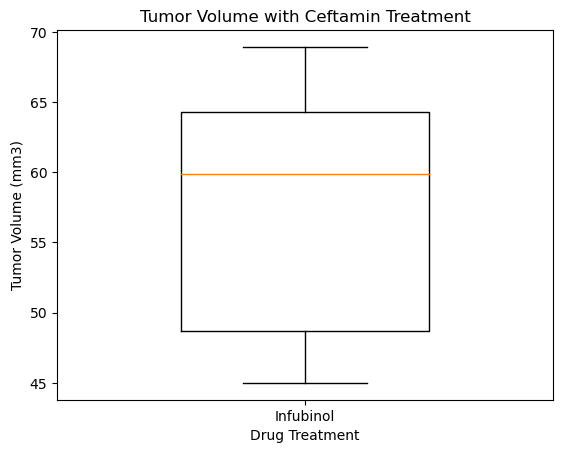

In [27]:
#Ceftamin box plot
Cefta_bplot = [Cefta_tumor_volume]
treatment = ['Infubinol']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume with Ceftamin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Treatment')
ax1.boxplot(Cefta_bplot, labels=treatment, widths = .5, vert=True)
plt.show()

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume=merge_df.loc[merge_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]

    
    # add subset 
    tumor_volume_data.append(tumor_volume)
    
    
# Determine outliers using upper and lower bounds
    quartiles=tumor_volume.quantile([.25,.5,.75])
    q1 = tumor_volume.quantile(0.25)
    q3 = tumor_volume.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = tumor_volume.loc[(tumor_volume < fence_low) | (tumor_volume > fence_high)]
    print(f"{treatment} outliers :{outliers}")


Capomulin outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers :31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)


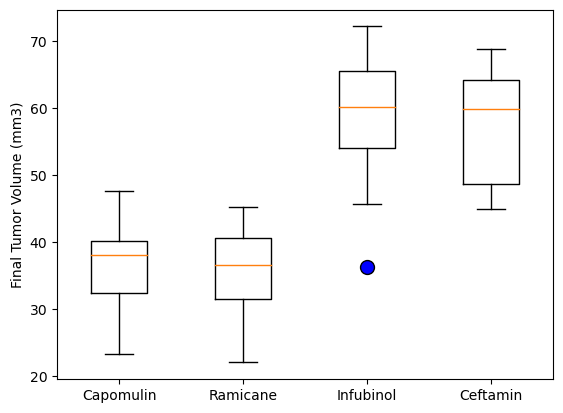

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='blue',markersize=10)
plt.boxplot(tumor_volume_data, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

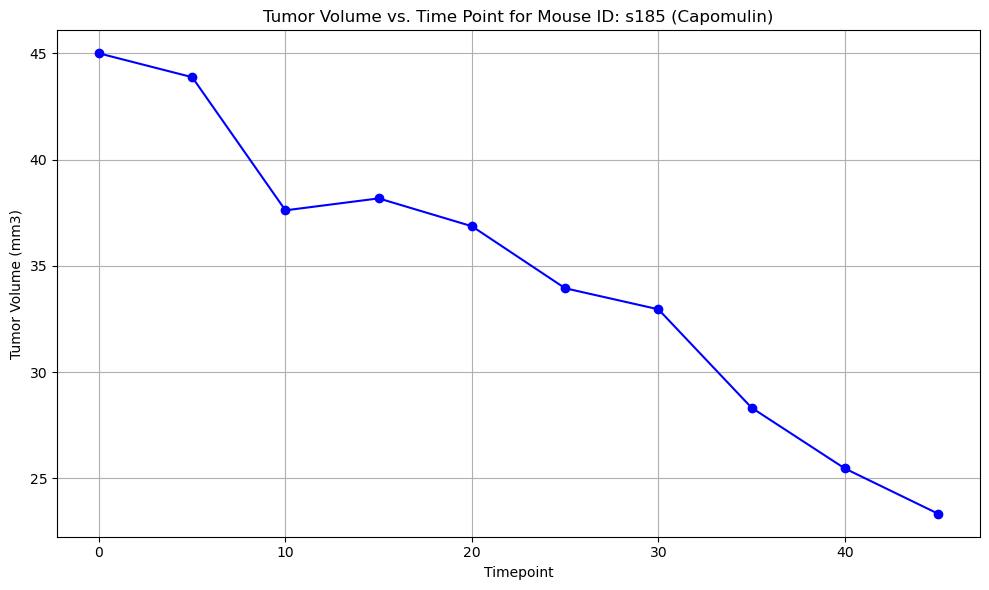

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for Capomulin regimen
capomulin_data= mice_id_clean2[mice_id_clean2["Drug Regimen"] == "Capomulin"]

# Choose a single mouse treated with Capomulin (you can replace 'mouse_id' with the desired Mouse ID)
mouse_id = capomulin_data["Mouse ID"].iloc[0]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] ==mouse_id]

# Create a line plot for tumor volume vs. time point for the chosen mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o', color='blue')

# Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)")

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/y1/q8p06sqd26z7smr29jdmp3pr0000gn/T/ipykernel_81235/1509277563.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol = capomulin_data.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

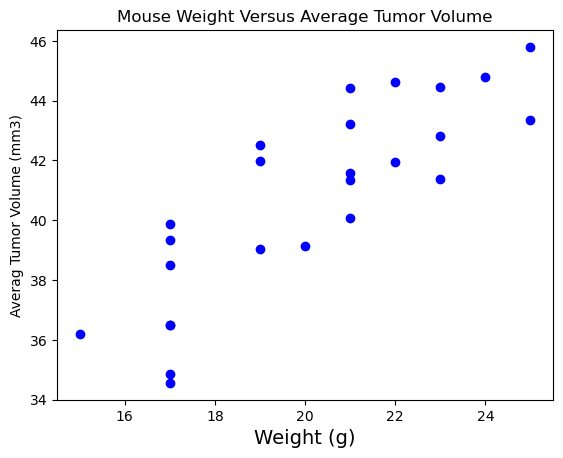

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol = capomulin_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.84


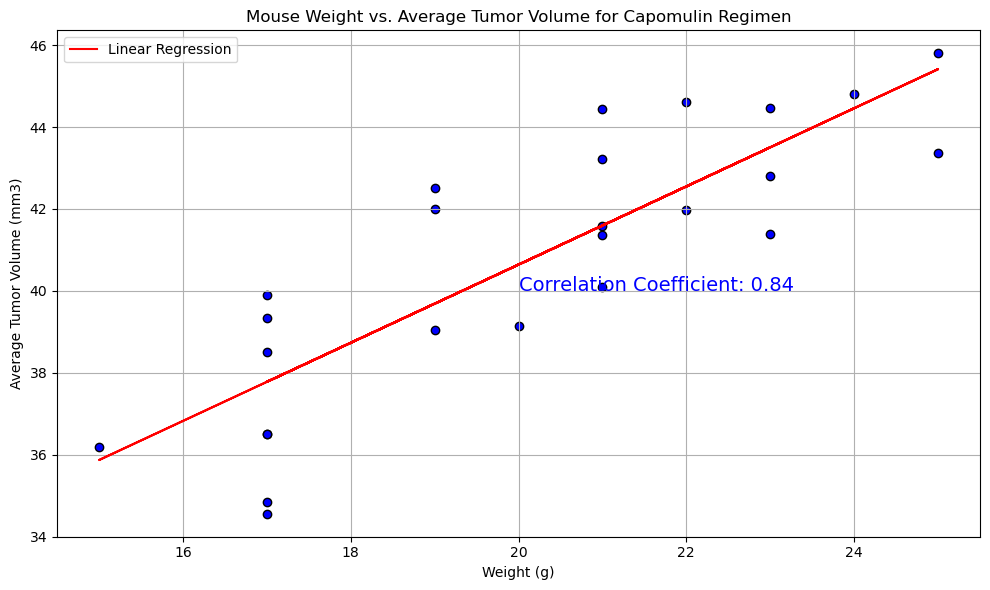

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = round(st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])[0], 2)
print(f'Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation_coefficient}')

model = st.linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
y_values = avg_capm_vol['Weight (g)'] * model[0] + model[1]

plt.figure(figsize=(10, 6))
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'],
            marker='o', color='blue', edgecolors='black')
plt.plot(avg_capm_vol['Weight (g)'], y_values,
         color='red', label='Linear Regression')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.text(20, 40, f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=14, color='blue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()